### Monte Carlo

- Monte Carlo is a stochastic method to approximate results by using random numbers
- A simple application is the approximation of $\pi$.
- We "draw" a unit circle inside a unit square: the area of the square is 4 and that of the
  circle is $\pi$ with a ratio of $\frac{\pi}{4}$.
- If we generate $n$ truly random numbers in the 2-d interval and $m$ of them fall inside the circle then $\frac{m}{n}\approx \frac{\pi}{4}$

In [1]:
import numpy.random as rand
from math import pi
import matplotlib.pyplot as plt
def approximatePi(n):
    m = 0
    for i in range(n):
        x = rand.uniform(-1,1)
        y = rand.uniform(-1,1)
        if x**2+y**2<=1:
            m+=1
    return 4*m/n
ests = []
for n in range(10, 10001, 10):
    est = approximatePi(n)
    ests.append(est)

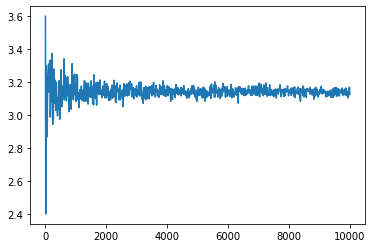

In [2]:
plt.plot(range(10,10001,10),ests)

### Coin toss

- Given a experiment with a set of possible outcomes $O$
- We would like to determine the **probability** of the occurrence of outcome $o\in O$
- There are two school in the field of probability/statistics:
    1. Bayesian
    1. Frequentist
- For simplicity we will use the frquentist interpretation: if an experiment is repeated $n$ times and outcome $o$ occurred $m$ times then in the limit of very large $n$ 
$$\frac{m}{n}\rightarrow Pr(o)$$

### Example: Coin toss

- In this experiment we toss two coins with possible outcomes: TT,TH,HT,HH
- Since we are assuming an unbiased coin we expect the probability of each outcome to be the same $\frac{1}{4}$
- Note that since each toss is independent of the others, tossing two coins at the same time or in sequence is the same

In [27]:
import numpy as np

trials=1000000
events=np.zeros((4))
for i in range(trials):
    t1=np.random.randint(0,2)
    t2=np.random.randint(0,2)
    if t1==0 and t2==0:
        events[0]+=1
    elif t1==0 and t2==1:
        events[1]+=1
    elif t1==1 and t2==0:
        events[2]+=1
    else:
        events[3]+=1

print(events/trials)

[0.25013  0.250296 0.250213 0.249361]


### Statistics

- Given a set of, seemingly random, data one would like to extract "meaningful" values from the data
- Some of such values are : mean ,median,variance, standard deviation,...

In [4]:
## 50,000 employees with salaries in 
## the range 12 to 36 MLL
incomes=np.random.randint(12,36+1,50000)
#add the income of 1000 members of parliament 
## between 120 adn 153 MLL
incomes=np.append(incomes,np.random.randint(120,153+1,1000))
## add the income of 5 presidents between 202 and 225
incomes=np.append(incomes,np.random.randint(202,225+1,5))
## add the incomes of 1 Speaker 208 
incomes=np.append(incomes,208)
## add the incomes of 7 primes ministers between 189 and 208
incomes=np.append(incomes,np.random.randint(189,208+1,7))
# Minimum income
print(np.min(incomes),np.max(incomes))

12 217


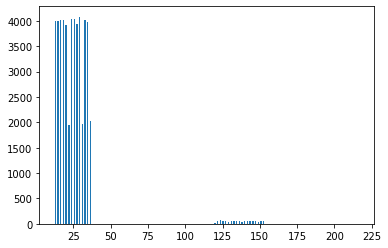

In [13]:
import matplotlib.pyplot as plt
plt.hist(incomes,bins=113,rwidth=0.5)
#plt.xlim(200,250)
#plt.ylim(0,20)
plt.show()

In [6]:
print(np.mean(incomes))
print(np.median(incomes))
print(np.percentile(incomes,50))

26.264756042577382
24.0
24.0


### Computing the mode

- The most frequently occurring value

In [7]:
from scipy import stats
stats.mode(incomes)

ModeResult(mode=array([29]), count=array([2061]))

In [14]:
a=list(filter(lambda x: x==29,incomes))
len(a)

2061

### Average, variance, standard deviation

- Mean $$\mu=\frac{1}{n}\sum_i v_i$$
- Variance $$Var=\frac{1}{n}\sum_i (v_i-\mu)^2$$
- Standard deviation $$\sigma=\sqrt{Var}$$

In [10]:
print(np.var(incomes),np.std(incomes))


305.8964617820742 17.48989599117371


### Adding a few billionaires 

- Now we add a few billionaires to the mix
- 6 people with random income in the range 1,125,000 to 1,500,000 MLL
- Compare the average and median before and after the additions

In [11]:
print(f'mean={np.mean(incomes):.2f}, median={np.median(incomes)}')
new_incomes=np.append(incomes,np.random.randint(1125000,1500000+1,6))
print(f'mean={np.mean(new_incomes):.2f}, median={np.median(new_incomes)}')
print(f'60% of the sample has income less than {np.percentile(new_incomes,60)}')
print(f'Var={np.var(incomes)}')

mean=26.26, median=24.0
mean=196.26, median=24.0
60% of the sample has income less than 27.0
Var=305.8964617820742


### Outliers

- One why of filtering outliers is to retain the results that are within two std of the median

median=24.0,std=15677.31


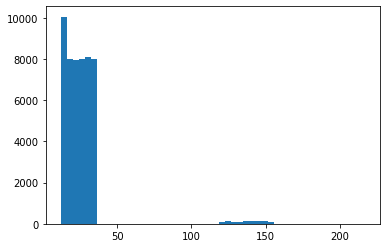

In [21]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - s < e < u + s)]
    return u,s,filtered
m,s,filtered = reject_outliers(new_incomes)
print(f'median={m},std={s:.2f}')
#plt.ylim(0,20)
plt.hist(filtered,50)
plt.show()

### Covariance and correlation coefficient

- Covariance of two random variables $X,Y$ is given by (where E is the expectation value)
$$cov(X,Y)=E[(X-E(X)(Y-E[Y])]$$
Alternatively

$$cov(X,Y)=E[XY]-E[X]E[Y]$$
- If $X$ and $Y$ are **independent** then $E[XY]=E[X]E[Y]$ and thus the covariance is zero
- A **normalized** measure of the covariance is the **correlation coefficient** with a value between -1 and 1

In [94]:
x=np.random.randint(10,11+1,1000)
y=np.random.randint(10,11+1,1000)
print("Covariance matrix")
print(np.cov(x,y))
print("Correlation coefficient")
print(np.corrcoef(x,y))


110.269
Covariance matrix
[[ 0.25012913 -0.00263463]
 [-0.00263463  0.25010611]]
Correlation coefficient
[[ 1.         -0.01053358]
 [-0.01053358  1.        ]]


In [89]:
x=[1,2,3]
y=[3,2,1]
np.corrcoef(x,y)

array([[ 1., -1.],
       [-1.,  1.]])

In [105]:
z=[v+23 for v in x]
np.corrcoef(x,z)

array([[1., 1.],
       [1., 1.]])